# Лабораторная работа 4

## Задача 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')
%matplotlib inline

In [3]:
from scipy import stats

In [4]:
nurse = pd.read_csv('Nursing Home Data_data.txt', sep = '\s+', encoding = 'cp1252')
nurse.head() # смотрим на данные

,BED,MCDAYS,TDAYS,PCREV,NSAL,FEXP,RURAL
0,244,128,385,23521,5230,5334,0
1,59,155,203,9160,2459,493,1
2,120,281,392,21900,6304,6115,0
3,120,291,419,22354,6590,6346,0
4,120,238,363,17421,5362,6225,0


In [8]:
# разделим на два датасета - за городом и нет
nurse_rur = nurse[nurse['RURAL']==1]
nurse_city = nurse[nurse['RURAL']==0]

Проверим обе выборки (годовые расходы больницы за городом и в городе) на нормальность

In [27]:
res = stats.shapiro(nurse_city['FEXP'])
print('p-value: ', res[1])

p-value:  0.003969298675656319


In [28]:
res = stats.shapiro(nurse_rur['FEXP'])
print('p-value: ', res[1])

p-value:  0.04017774015665054


Гипотеза о нормальности для городских больниц отвергается при уровне значимости $\alpha = 0.01, 0.05$, для загородных - отвергается при уровне значимости $\alpha = 0.05$.
Посмотрим на распределения подробнее.

(array([5., 7., 4., 3., 3., 3., 3., 2., 2., 2.]),
 array([ 137. ,  767.5, 1398. , 2028.5, 2659. , 3289.5, 3920. , 4550.5,
        5181. , 5811.5, 6442. ]),
 <BarContainer object of 10 artists>)

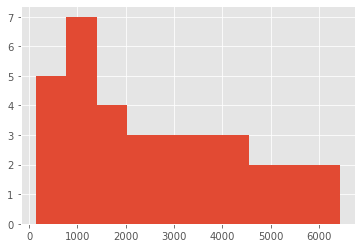

In [18]:
plt.hist(nurse_rur['FEXP'])  # загородные

Визуально наблюдается скошенность вправо - прологарифмируем

(array([1., 1., 1., 2., 0., 7., 4., 4., 5., 9.]),
 array([2.13672057, 2.30395058, 2.4711806 , 2.63841061, 2.80564063,
        2.97287064, 3.14010066, 3.30733067, 3.47456069, 3.64179071,
        3.80902072]),
 <BarContainer object of 10 artists>)

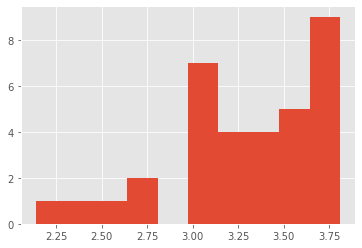

In [36]:
plt.hist(np.log10(nurse_rur['FEXP']))

(array([ 1.,  2.,  2.,  4.,  7.,  7., 11.]),
 array([2.13672057, 2.37562059, 2.61452061, 2.85342063, 3.09232065,
        3.33122068, 3.5701207 , 3.80902072]),
 <BarContainer object of 7 artists>)

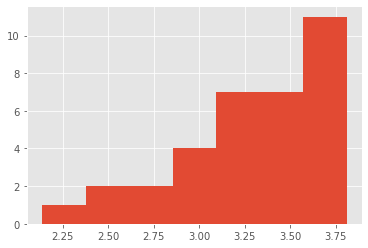

In [42]:
plt.hist(np.log10(nurse_rur['FEXP']), bins = 7)

In [37]:
res = stats.shapiro(np.log10(nurse_rur['FEXP']))
print('p-value: ', res[1])

p-value:  0.014657312072813511


Итак, после логарифмирования сохраняется грубое отличие от колоколообразной формы распределения; гипотеза о нормальности отвергается при уровне значимости $\alpha = 0.05$.

(array([8., 0., 1., 0., 2., 0., 2., 0., 1., 4.]),
 array([ 907. , 1450.9, 1994.8, 2538.7, 3082.6, 3626.5, 4170.4, 4714.3,
        5258.2, 5802.1, 6346. ]),
 <BarContainer object of 10 artists>)

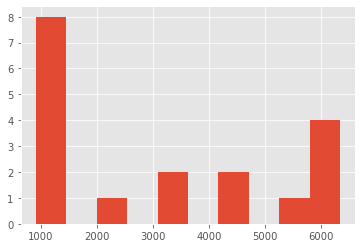

In [38]:
plt.hist(nurse_city['FEXP'])  # городские

Значительная часть наблюдений выборки городских больниц сосредоточена на концах, что является существенным отличием от нормальности.

Итак, распределение обеих выборок значительно отличается от нормального. Значит, в данном случае некорректно использовать критерий Стьюдента, также выборки являются независимыми - для проверки гипотезы о равенстве центров распределений используем критерий Манна-Уитни.

In [56]:
x = nurse_rur['FEXP']
y = nurse_city['FEXP']
x.name, y.name = 'rural', 'city'

In [50]:
def two_histograms(x, y):
    x.hist(alpha=0.5, weights=[1./len(x)]*len(x))
    y.hist(alpha=0.5, weights=[1./len(y)]*len(y))
    plt.axvline(x.mean(), color='red', alpha=0.8, linestyle='dashed')
    plt.axvline(y.mean(), color='blue', alpha=0.8, linestyle='dashed')
    plt.legend([x.name, y.name])

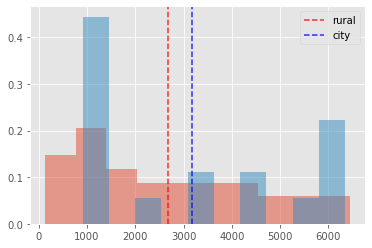

In [57]:
two_histograms(x,y)

In [55]:
res = stats.mannwhitneyu(x, y)
print('p-value:', res[1])

p-value: 0.26594759448891914


На уровнях значимости $\alpha = 0.01, 0.05$ основная гипотеза не отвергается - делаем вывод, что годовые расходы больниц за городом и в городе отличается незначимо.

# Задача 2

In [66]:
union = pd.read_csv('Unions and State Labor Law_data.txt', sep = '\s+', encoding = 'cp1252')
union.head() # смотрим на данные

,STATE,DENS,COMP,RTW,PVT
0,NY,56.9,1,0,31.2
1,MI,49.6,1,0,30.2
2,WA,32.4,1,0,33.1
3,HI,54.6,1,0,24.7
4,AK,30.7,1,0,30.1


In [67]:
# разделим на два датасета - штаты, в которых закон принят и не принят
union_rtw = union[union['RTW']==1]
union_nortw = union[union['RTW']==0]

In [70]:
res = stats.shapiro(union_rtw['DENS'])
print('p-value: ', res[1])

p-value:  0.6463996171951294


In [71]:
res = stats.shapiro(union_nortw['DENS'])
print('p-value: ', res[1])

p-value:  0.19173066318035126


In [72]:
x1 = union_rtw['DENS']
y1 = union_nortw['DENS']
x1.name, y1.name = 'rtw', 'no rtw'

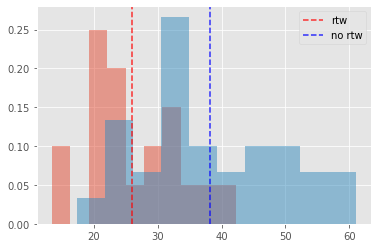

In [73]:
two_histograms(x1,y1)

In [75]:
res = stats.fligner(x1, y1)
print('p-value: ', res[1])

p-value:  0.12569758439648201


Для обеих выборок гипотеза о нормальности распределения на уровнях значимости $\alpha = 0.01, 0.05$ не отвергается, выборки независмы (разные штаты США), гипотеза о равенстве дисперсий не отвергается - используем критерий Стьюдента для независимых выборок с параметром для равенства дисперсий.

In [74]:
res = stats.ttest_ind(x1, y1, equal_var=True)
print('p-value: ', res[1])

p-value:  9.287017631717846e-05


Гипотеза о равенстве центров распределений отвергается на уровнях значимости $\alpha = 0.01, 0.05$. Делаем вывод, что средние значения значимо отличаются друг от друга (судя по совместной гистограмме, в штатах, в которых не принят закон, в среднем выше процент муниципальных служащих, состоящих в профсоюзах).